In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [71]:
data=pd.read_csv('heart_disease_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [72]:
df=pd.DataFrame(data)
df.head()


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [75]:
X = df[['Blood Pressure', 'Cholesterol']]
y = df['Heart Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Accuracy: 0.625
Precision: 0.5573770491803278
Recall: 0.4146341463414634
F1 Score: 0.4755244755244755
Confusion Matrix:
 [[91 27]
 [48 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71       118
           1       0.56      0.41      0.48        82

    accuracy                           0.62       200
   macro avg       0.61      0.59      0.59       200
weighted avg       0.61      0.62      0.61       200



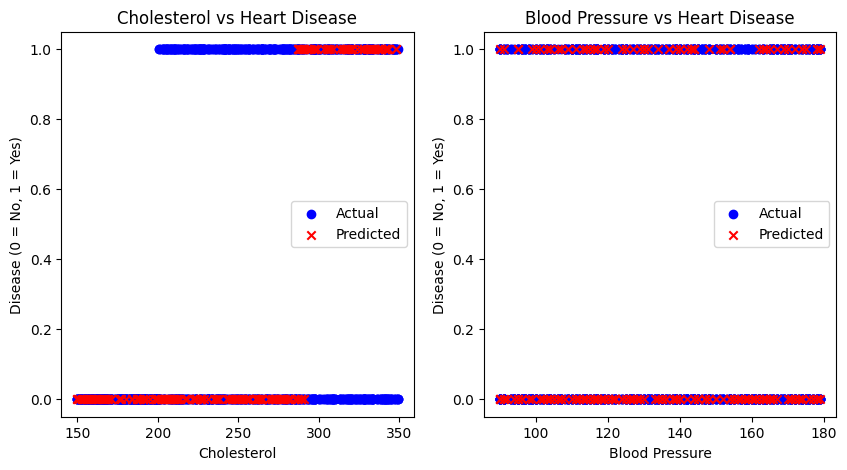

In [76]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)

plt.scatter(df['Cholesterol'], df['Heart Disease'], color='blue', label='Actual')
plt.scatter(X_test['Cholesterol'], y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Cholesterol')
plt.ylabel('Disease (0 = No, 1 = Yes)')
plt.title('Cholesterol vs Heart Disease')

plt.legend()
plt.subplot(1,2,2)
plt.scatter(df['Blood Pressure'], df['Heart Disease'], color='blue', label='Actual')
plt.scatter(X_test['Blood Pressure'], y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Blood Pressure')
plt.ylabel('Disease (0 = No, 1 = Yes)')
plt.title('Blood Pressure vs Heart Disease')

plt.legend()
plt.show()

Accuracy: 0.87
Precision: 0.8414634146341463
Recall: 0.8414634146341463
F1 Score: 0.8414634146341463
Confusion Matrix:
 [[105  13]
 [ 13  69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       118
           1       0.84      0.84      0.84        82

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



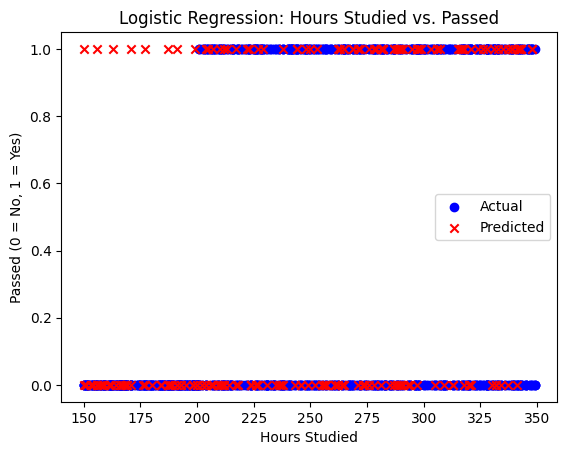

In [77]:
X = df[['Age', 'Cholesterol']]
y = df['Heart Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize the results (for simplicity, just hours studied vs. passed)
plt.scatter(df['Cholesterol'], df['Heart Disease'], color='blue', label='Actual')
plt.scatter(X_test['Cholesterol'], y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Passed (0 = No, 1 = Yes)')
plt.title('Logistic Regression: Hours Studied vs. Passed')
plt.legend()
plt.show()

In [78]:
df= df. drop('Alcohol Intake', axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Exercise Hours           1000 non-null   int64 
 7   Family History           1000 non-null   object
 8   Diabetes                 1000 non-null   object
 9   Obesity                  1000 non-null   object
 10  Stress Level             1000 non-null   int64 
 11  Blood Sugar              1000 non-null   int64 
 12  Exercise Induced Angina  1000 non-null   object
 13  Chest Pain Type          1000 non-null   object
 14  Heart Disease            1000 non-null   

In [79]:
from sklearn.preprocessing import OneHotEncoder


In [80]:
cat_col= df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False) # to create dense
encoded = encoder.fit_transform(df[cat_col]) # fit and transform the data [[]] to make it df not series, result is 2D array
# labels the columns appropriately according to categories
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out()) # convert 2D array into pandas df again
# Combine encoded data with other features
df_encoded = pd.concat([encoded, df.drop(columns=cat_col)], axis=1) # axis=1: This specifies that the concatenation should occur horizontally, i.e., along the column axis.



In [81]:
X=df_encoded.drop(['Heart Disease'],axis=1)
y=df_encoded['Heart Disease']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.83
Precision: 0.8076923076923077
Recall: 0.7682926829268293
F1 Score: 0.7875
Confusion Matrix:
 [[103  15]
 [ 19  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       118
           1       0.81      0.77      0.79        82

    accuracy                           0.83       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200



c:\Users\Afan Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
